# Python Visualization Guide: matplotlib, seaborn, plotly

Practical demonstrations using sales data. Focus: core functionality, minimal code.

## Setup

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Load data
sales = pd.read_csv('files/sales_records.csv')
products = pd.read_csv('files/products_master.csv')
regions = pd.read_csv('files/regions_dim.csv')

# Join tables
df = (sales
      .merge(products, on='product_id', how='left')
      .merge(regions, on='region_code', how='left'))

# Prep date column
df['order_date'] = pd.to_datetime(df['order_date'])
df['year_month'] = df['order_date'].dt.to_period('M').astype(str)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print(f"Data ready: {len(df)} rows")

Data ready: 260 rows


---
## 1. Bar Charts - Comparing Categories

Use bar charts to compare values across categories.

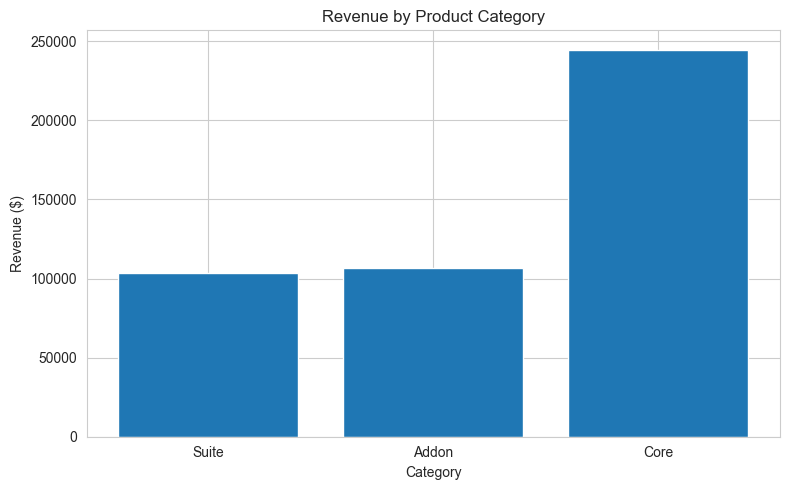

In [17]:
# Basic bar chart - matplotlib
category_revenue = df.groupby('category')['revenue'].sum().sort_values()

plt.figure(figsize=(8, 5))
plt.bar(category_revenue.index, category_revenue.values)
plt.xlabel('Category')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Product Category')
plt.tight_layout()
plt.savefig('outputs/bar_chart.png', dpi=150, bbox_inches='tight')  # Save to file
plt.show()

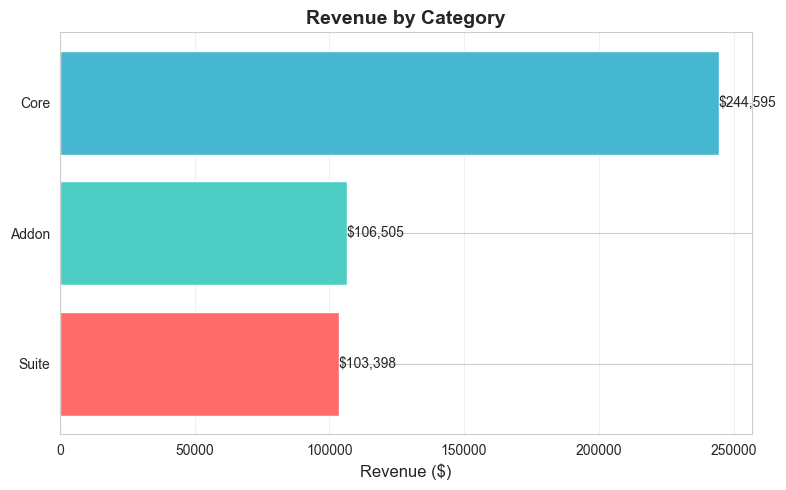

In [18]:
# Enhanced: colors, horizontal, formatted labels
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(category_revenue.index, category_revenue.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])  # Custom colors
ax.set_xlabel('Revenue ($)', fontsize=12)
ax.set_title('Revenue by Category', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'${width:,.0f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

---
## 2. Line Charts - Trends Over Time

Line charts show how values change over time.

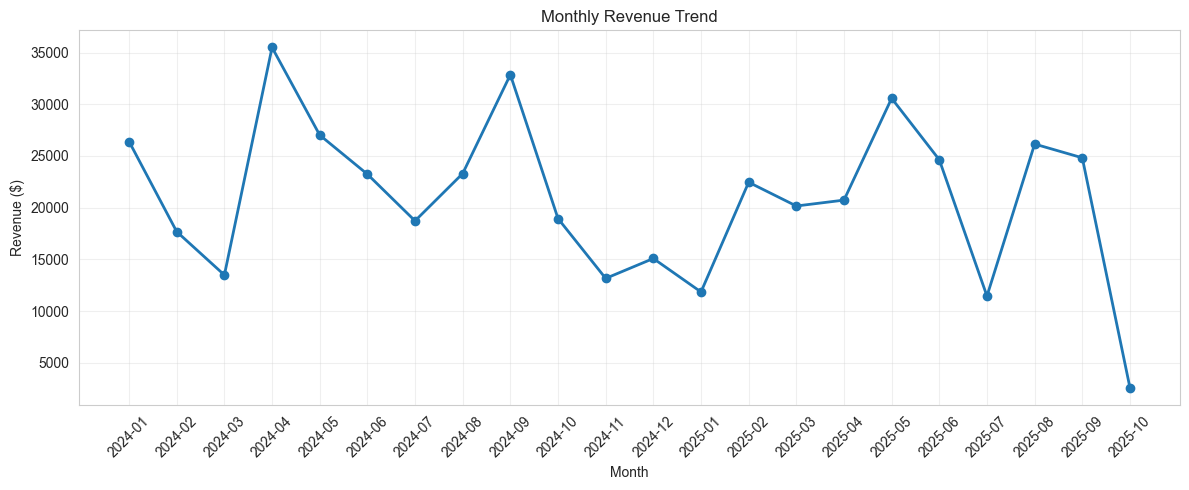

In [19]:
# Simple time series - matplotlib
monthly = df.groupby('year_month')['revenue'].sum()

plt.figure(figsize=(12, 5))
plt.plot(monthly.index, monthly.values, marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

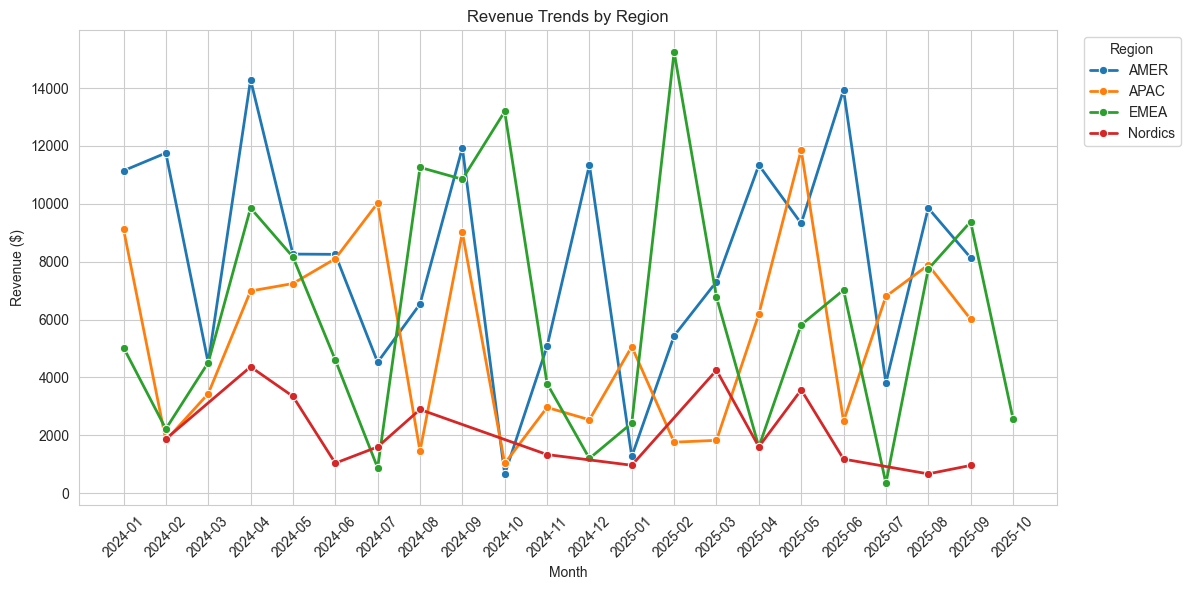

In [20]:
# Multiple lines by region - seaborn (cleaner syntax)
monthly_region = df.groupby(['year_month', 'region'])['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_region, x='year_month', y='revenue', 
             hue='region', marker='o', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Revenue Trends by Region')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')  # Legend outside
plt.tight_layout()
plt.show()

---
## 3. Scatter Plots - Exploring Relationships

Scatter plots reveal correlations between two variables.

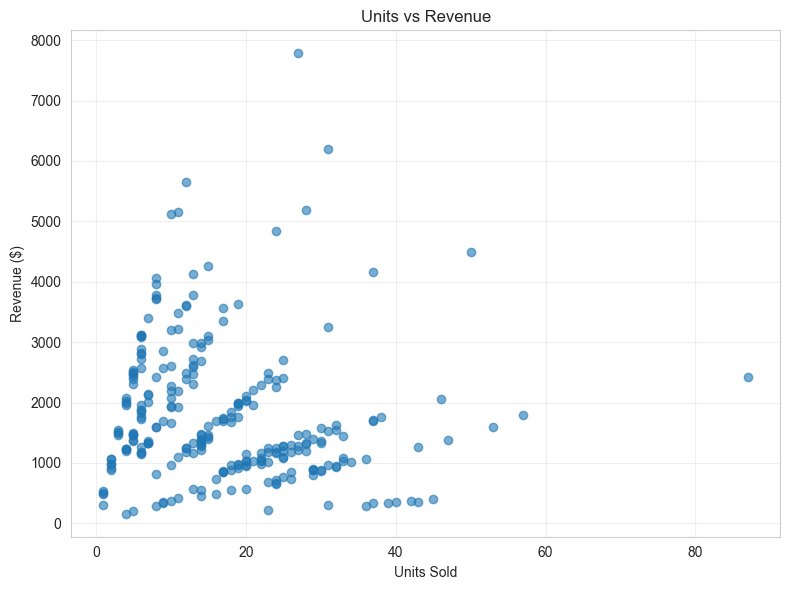

In [21]:
# Basic scatter - matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['units'], df['revenue'], alpha=0.6)
plt.xlabel('Units Sold')
plt.ylabel('Revenue ($)')
plt.title('Units vs Revenue')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

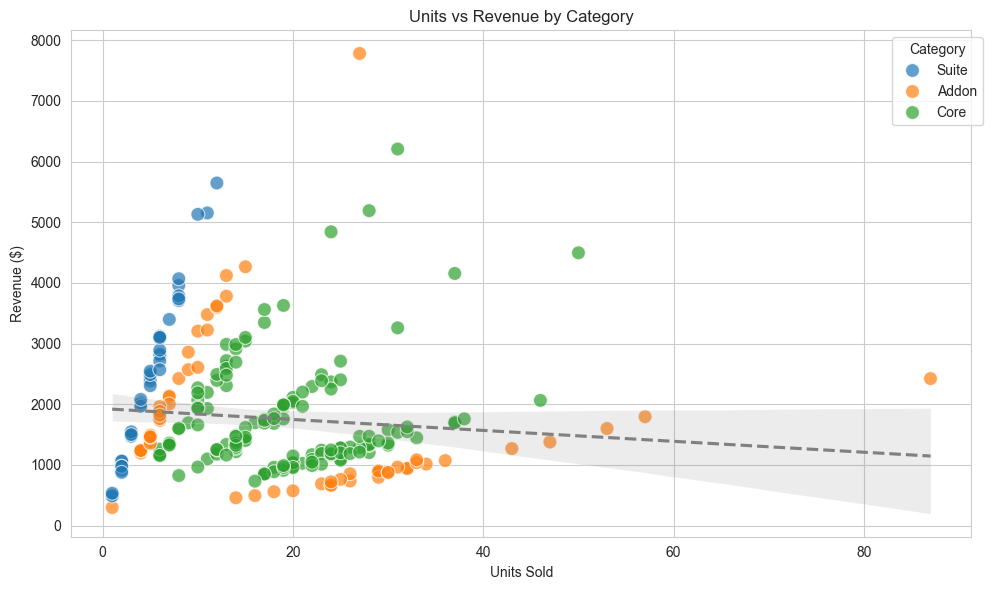

In [22]:
# Enhanced: color by category + regression line - seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='units', y='revenue', hue='category', 
                s=100, alpha=0.7)  # s=size, alpha=transparency
sns.regplot(data=df, x='units', y='revenue', 
            scatter=False, color='gray', line_kws={'linestyle':'--'})  # Trend line
plt.xlabel('Units Sold')
plt.ylabel('Revenue ($)')
plt.title('Units vs Revenue by Category')
plt.legend(title='Category', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

---
## 4. Distributions - Understanding Data Spread

Histograms and box plots show how data is distributed.

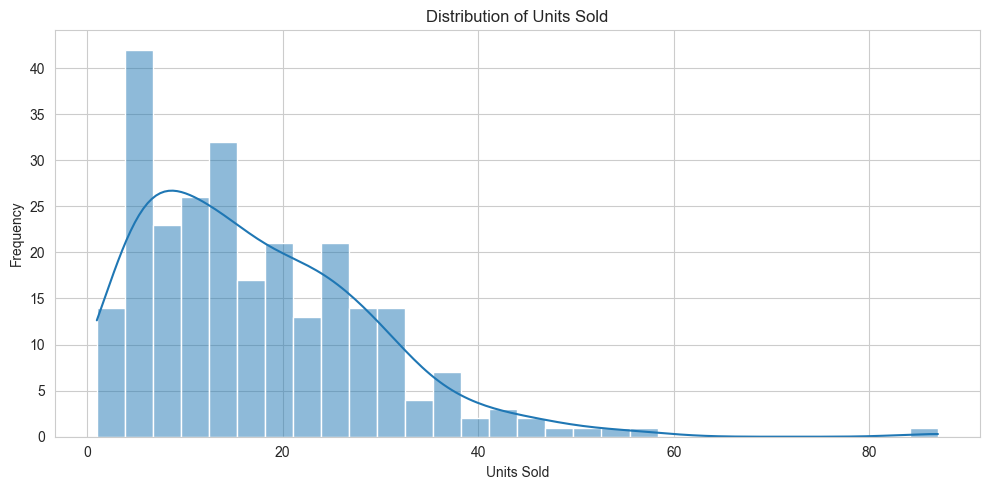

In [23]:
# Histogram with KDE - seaborn
plt.figure(figsize=(10, 5))
sns.histplot(df['units'], bins=30, kde=True)  # kde=density curve
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Units Sold')
plt.tight_layout()
plt.show()

/var/folders/g6/y66lfcbs6819h0g4gbt0ks7w0000gn/T/ipykernel_97767/2423749545.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




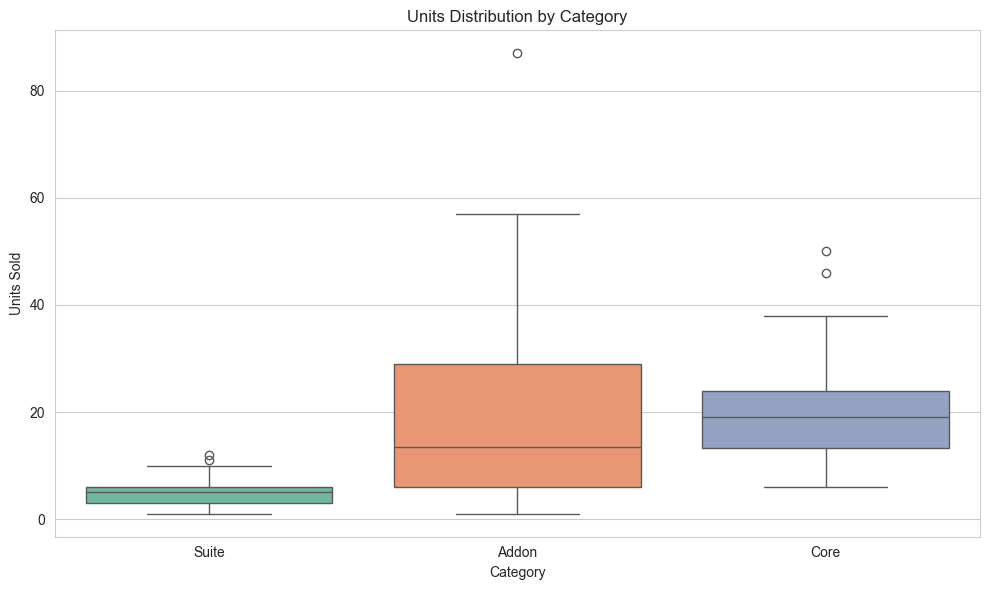

In [24]:
# Box plots by category - shows quartiles and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='units', palette='Set2')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.title('Units Distribution by Category')
plt.tight_layout()
plt.show()

---
## 5. Heatmaps - Spotting Patterns in Matrices

Heatmaps visualize patterns in pivot tables or correlation matrices.

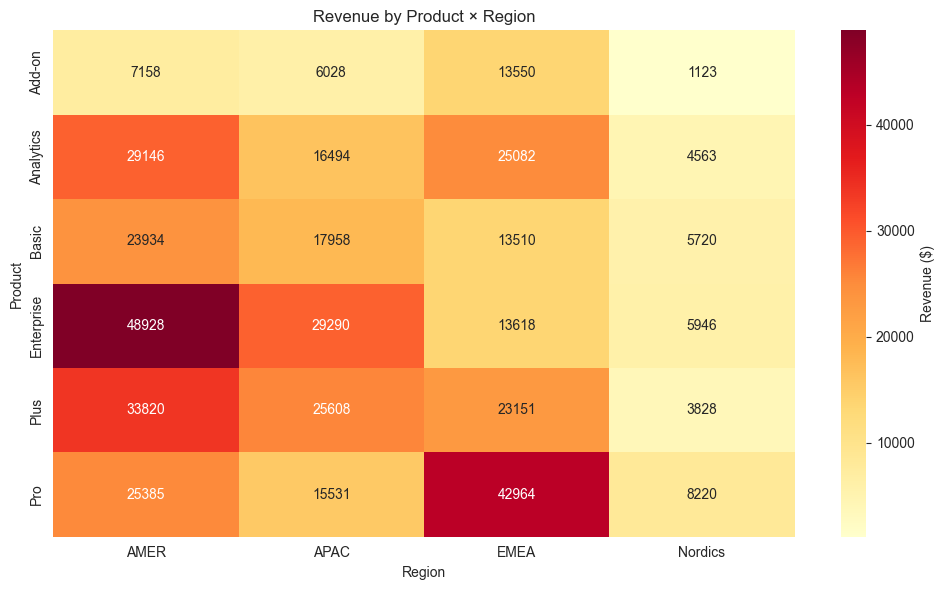

In [25]:
# Product × Region revenue heatmap
pivot = df.pivot_table(index='product', columns='region', 
                       values='revenue', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd',  # annot=show values
            cbar_kws={'label': 'Revenue ($)'})
plt.xlabel('Region')
plt.ylabel('Product')
plt.title('Revenue by Product × Region')
plt.tight_layout()
plt.savefig('outputs/heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

---
## 6. Interactive Plots - Exploration and Dashboards

Plotly creates interactive charts for web dashboards and data exploration.

In [26]:
!python -m pip install --upgrade nbformat

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [27]:
# Interactive scatter - hover shows details
fig = px.scatter(df, x='units', y='revenue', color='category',
                 hover_data=['product', 'region'],  # Shows on hover
                 title='Units vs Revenue (Interactive)',
                 labels={'units': 'Units Sold', 'revenue': 'Revenue ($)'})
fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.write_html('outputs/interactive_scatter.html')  # Save as HTML
fig.show()

In [28]:
# Interactive bar chart
region_revenue = df.groupby('region')['revenue'].sum().reset_index()

fig = px.bar(region_revenue, x='region', y='revenue',
             title='Revenue by Region (Click bars to explore)',
             labels={'revenue': 'Revenue ($)', 'region': 'Region'},
             color='revenue', color_continuous_scale='Blues')
fig.update_layout(showlegend=False)
fig.show()

In [29]:
# Interactive time series with range slider
monthly_df = df.groupby('year_month')['revenue'].sum().reset_index()
monthly_df['date'] = pd.to_datetime(monthly_df['year_month'])

fig = px.line(monthly_df, x='date', y='revenue',
              title='Monthly Revenue with Range Slider',
              labels={'revenue': 'Revenue ($)', 'date': 'Month'})
fig.update_xaxes(rangeslider_visible=True)  # Add range slider
fig.show()

---
## 7. Subplots - Multiple Views in One Figure

Combine multiple charts for comprehensive analysis.

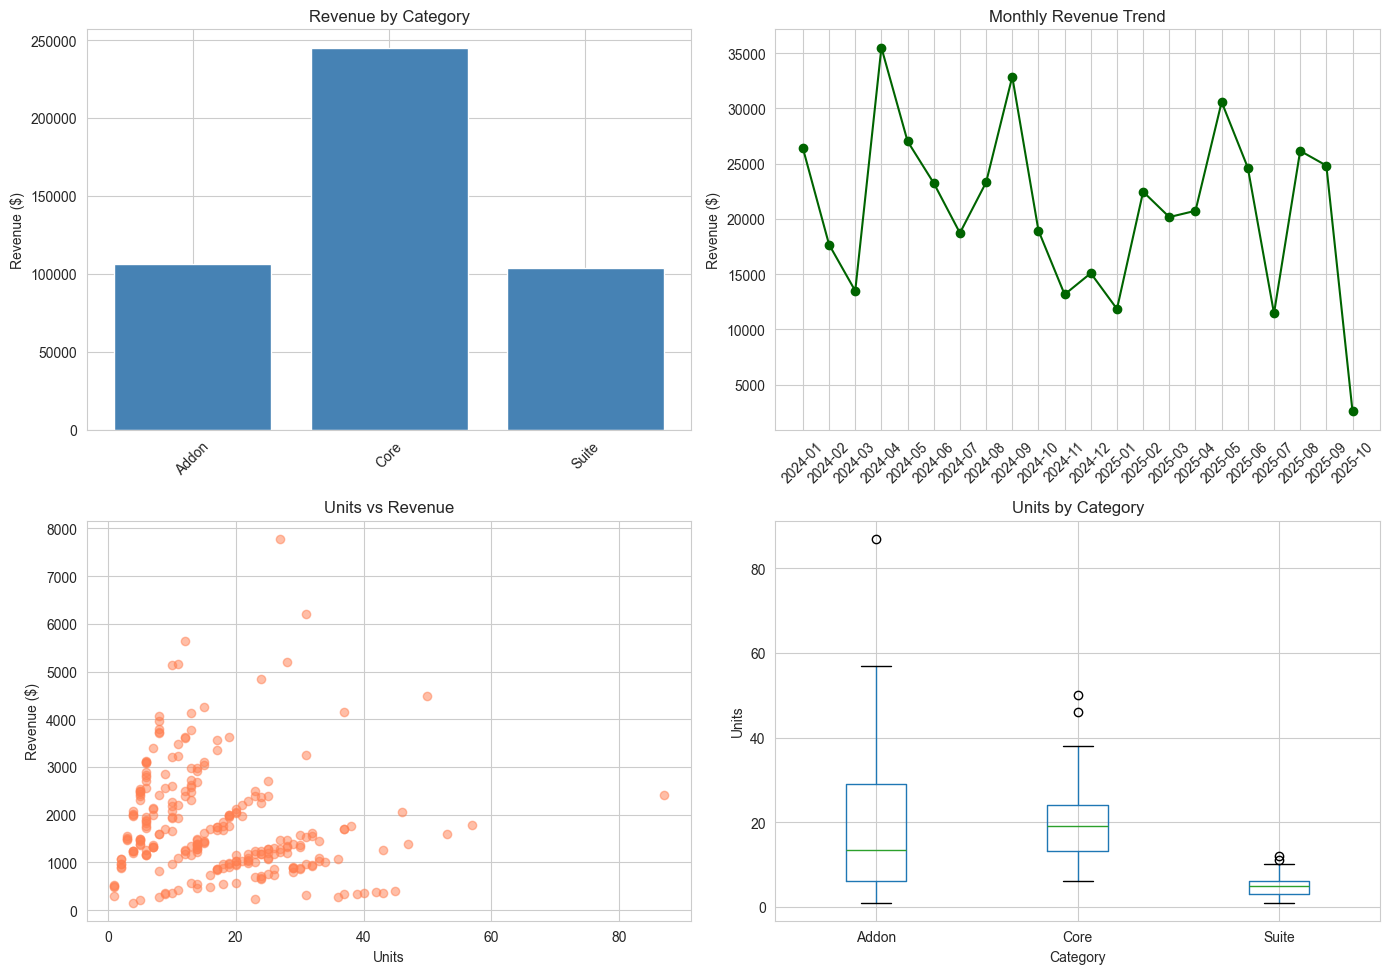

In [30]:
# 2×2 grid of different chart types
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top-left: Bar chart
category_rev = df.groupby('category')['revenue'].sum()
axes[0, 0].bar(category_rev.index, category_rev.values, color='steelblue')
axes[0, 0].set_title('Revenue by Category')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Top-right: Line chart
monthly = df.groupby('year_month')['revenue'].sum()
axes[0, 1].plot(monthly.index, monthly.values, marker='o', color='darkgreen')
axes[0, 1].set_title('Monthly Revenue Trend')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bottom-left: Scatter
axes[1, 0].scatter(df['units'], df['revenue'], alpha=0.5, color='coral')
axes[1, 0].set_title('Units vs Revenue')
axes[1, 0].set_xlabel('Units')
axes[1, 0].set_ylabel('Revenue ($)')

# Bottom-right: Box plot
df.boxplot(column='units', by='category', ax=axes[1, 1])
axes[1, 1].set_title('Units by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Units')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

---
## Library Comparison

| Library | Best For | Pros | Cons |
|---------|----------|------|------|
| **matplotlib** | Publication-ready, full control | Highly customizable, standard, stable | Verbose syntax, requires more code |
| **seaborn** | Statistical plots, quick aesthetics | Clean defaults, built-in themes, less code | Less control, slower with large data |
| **plotly** | Interactive dashboards, web apps | Engaging, hover details, zoom/pan | Large HTML files, overkill for static |

- **Static report/paper?** → matplotlib or seaborn
- **Dashboard/web app?** → plotly
- **Quick exploration?** → seaborn
- **Precise control needed?** → matplotlib
- **Statistical plots?** → seaborn
- **Need interactivity?** → plotly

---
### Topics not covered:

**Plot Types:**
- 3D plots (surface, scatter3d)
- Geographic maps (choropleth, scatter_geo)
- Network graphs
- Sankey diagrams
- Animations

**Customization:**
- Custom color palettes and colormaps
- Advanced subplot layouts (GridSpec)
- Custom legends and annotations
- Dual y-axes
- Log scales

### Continue Learning

**Docs:**
- [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html)
- [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [plotly documentation](https://plotly.com/python/)
